In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the Data
#MNIST data is a set of ~70000 photos of handwritten digits, each photo is of size 28x28, and it’s black and white.
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

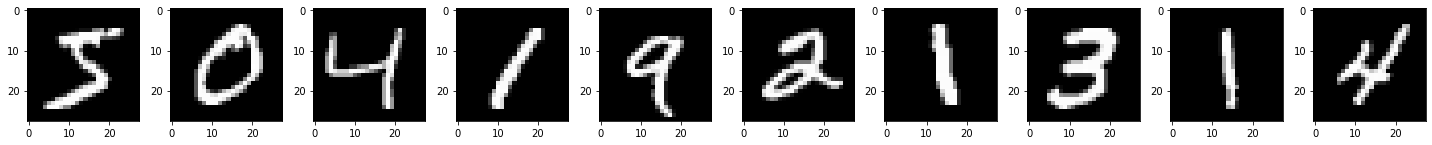

In [5]:
# visualisation de 10 premiers images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(train_images[i], cmap='gray')

plt.tight_layout()
plt.show()

In [6]:
print(train_images.shape)
dim_data = np.prod(train_images.shape[1:])
print(dim_data)
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)
print(train_data.shape)


(60000, 28, 28)
784
(60000, 784)


In [7]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
#Converts a class vector (integers) to binary class matrix
from tensorflow.keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
train_labels_one_hot[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
#model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Compile defines the loss function, the optimizer and the metrics
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#fit the model
model.fit(train_data, train_labels_one_hot, batch_size=100, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 249us/sample - loss: 3.0204 - accuracy: 0.8934 - val_loss: 0.3636 - val_accuracy: 0.9398
Epoch 2/20
60000/60000 [==============================] - 11s 185us/sample - loss: 0.3550 - accuracy: 0.9419 - val_loss: 0.2719 - val_accuracy: 0.9453
Epoch 3/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2846 - accuracy: 0.9530 - val_loss: 0.2979 - val_accuracy: 0.9598
Epoch 4/20
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2489 - accuracy: 0.9597 - val_loss: 0.2841 - val_accuracy: 0.9546
Epoch 5/20
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2256 - accuracy: 0.9644 - val_loss: 0.2761 - val_accuracy: 0.9593
Epoch 6/20
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1952 - accuracy: 0.9686 - val_loss: 0.3636 - val_accuracy: 0.9567
Epoch 7/20
60000/60000 [====================

In [13]:
# evaluate the model
_, accuracy = model.evaluate(test_data, test_labels_one_hot)
accuracy

10000/10000 [==============================] - 2s 216us/sample - loss: 0.7076 - accuracy: 0.9719 - loss: 0.9371 - accuracy: 0. - E


0.9719

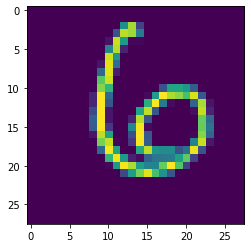

In [54]:
import matplotlib.pyplot as plt
plt.imshow(test_data[100].reshape((28,28)))

In [53]:
model.predict(test_data)[100]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)